<a href="https://colab.research.google.com/github/Ankushsaini90/Bike-sharing-demand/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing some library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Importing the dataset
data = pd.read_csv('/content/SeoulBikeData (1).csv',encoding= 'unicode_escape')

##Exploratory data analysis

In [31]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [32]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [33]:
# Checking size of the data
data.shape

(8760, 14)

So , we have 8760 rows and 14 columns.

In [34]:
# checking null values
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Greate!! We have 0 null values **

In [35]:
# checking info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [36]:
# data description
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [37]:
# extracting day,month, day of week and weekdays/weekend from date column

data['Date']=pd.to_datetime(data['Date'])
data['month'] = data['Date'].apply(lambda x : x.month)
data['week_day'] = data['Date'].dt.day_name()

In [38]:
data = data.drop(['Date'],axis=1)

In [39]:
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,week_day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,Thursday


# Numeric feature

In [40]:
num_feature = data.select_dtypes(exclude='object')

In [41]:
num_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  month                      8760 non-null   int64  
dtypes: float64(6), int64(5)
memory usage: 752.9 KB


In [42]:
num_feature.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000


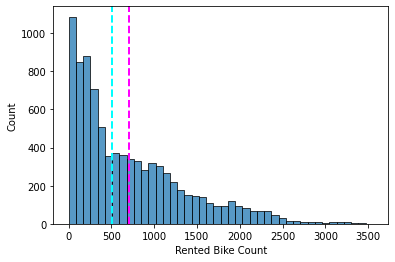

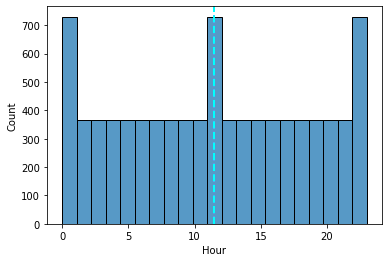

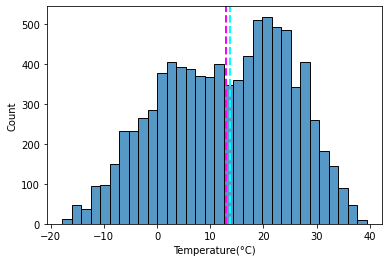

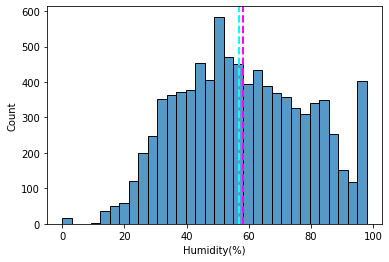

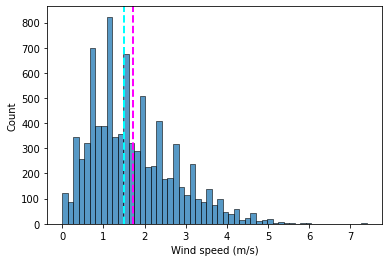

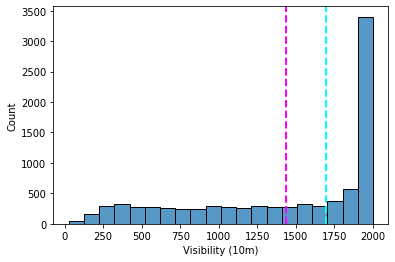

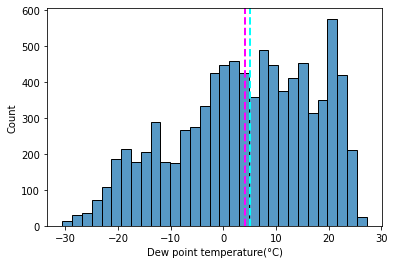

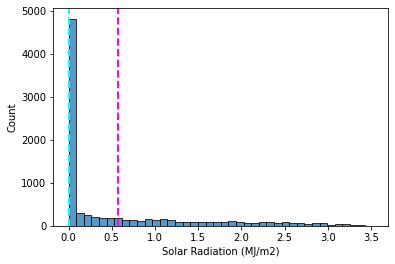

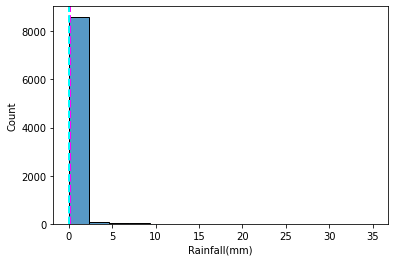

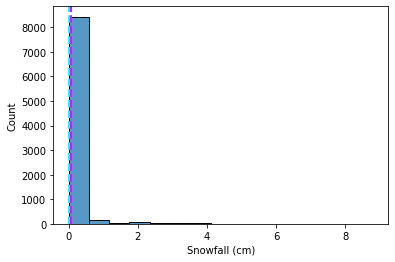

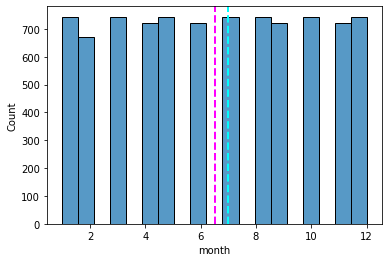

In [58]:
#plotting histogram

for col in num_feature[:]:
  sns.histplot(data[col])
  plt.axvline(data[col].mean(), color='magenta', linestyle='dashed', linewidth=2) 
  plt.axvline(data[col].median(), color='cyan', linestyle='dashed', linewidth=2)  
  plt.show()

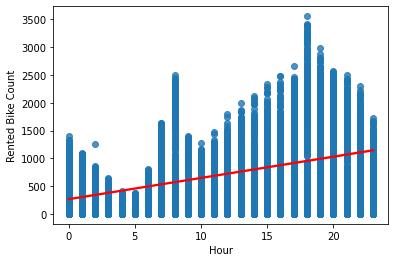

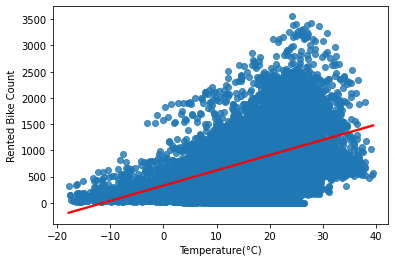

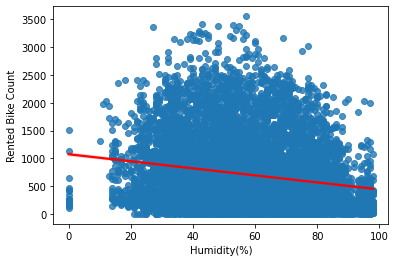

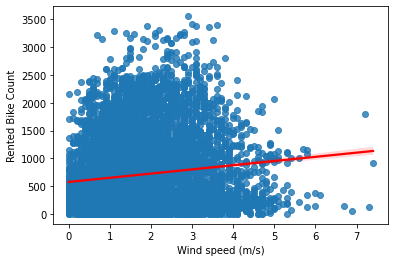

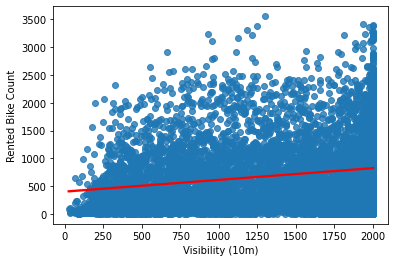

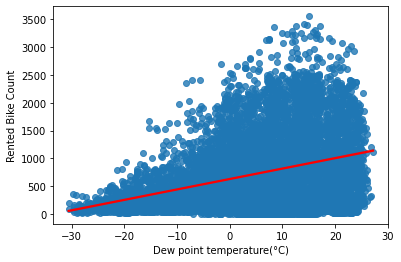

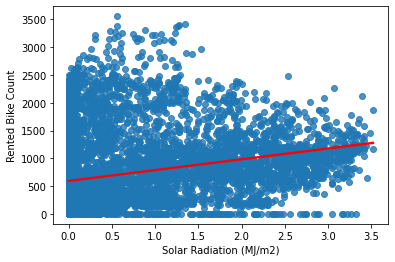

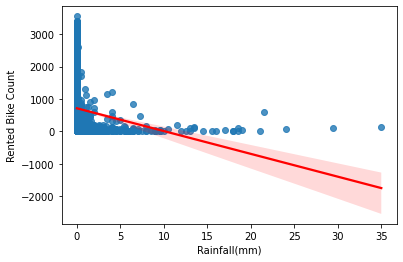

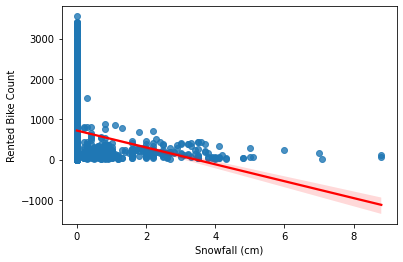

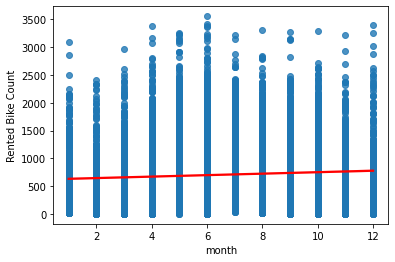

In [44]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in num_feature[:]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=data[col],y=data["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

# Categorical features

In [45]:
cat_features= data.select_dtypes(include='object')

In [46]:
cat_features.head()

,Seasons,Holiday,Functioning Day,week_day
0,Winter,No Holiday,Yes,Thursday
1,Winter,No Holiday,Yes,Thursday
2,Winter,No Holiday,Yes,Thursday
3,Winter,No Holiday,Yes,Thursday
4,Winter,No Holiday,Yes,Thursday


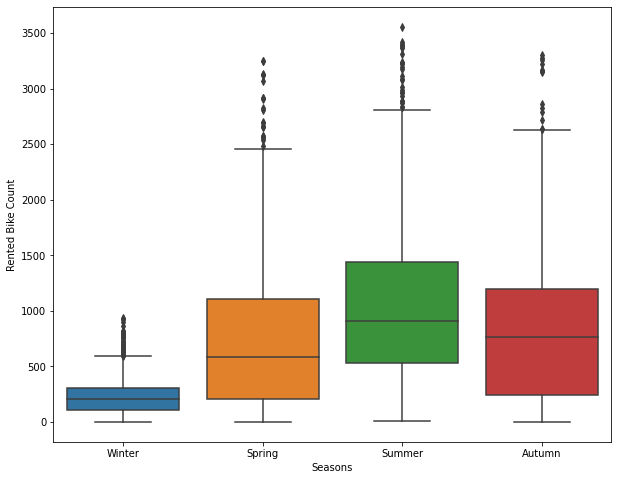

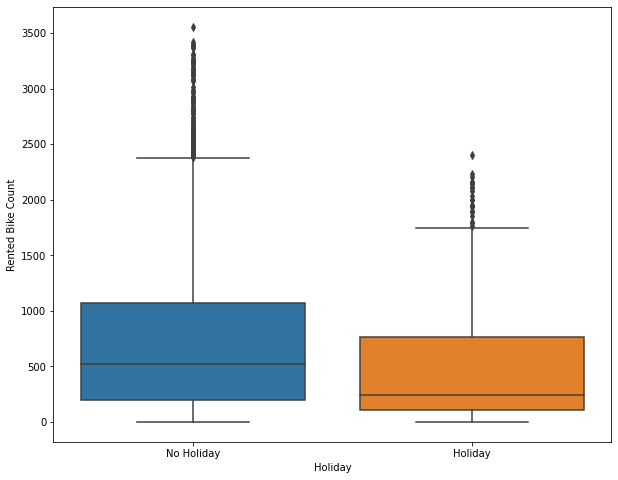

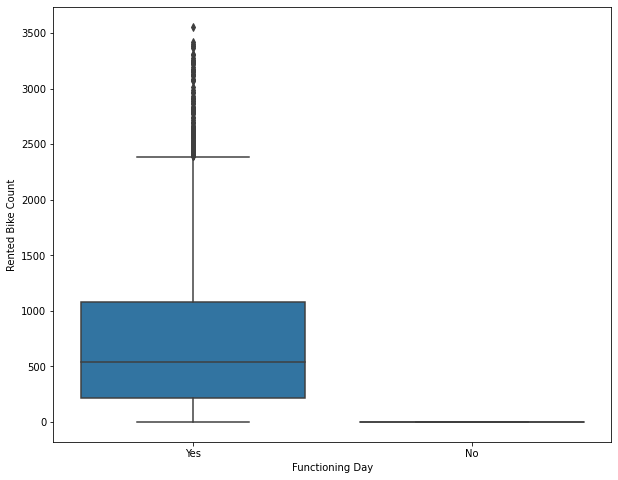

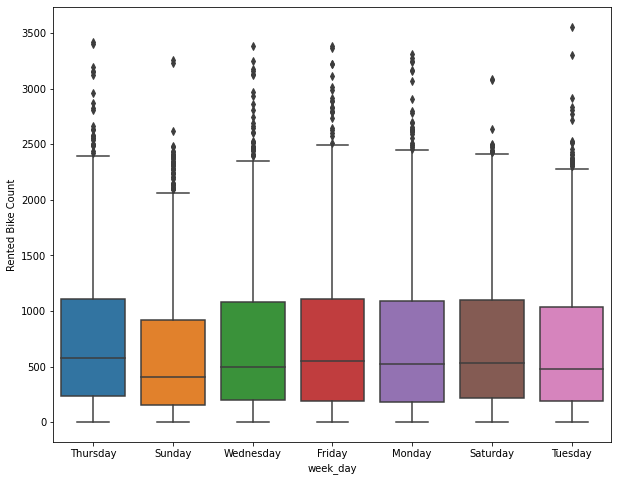

In [47]:
#ploting Box plot to visualize Categorical features
for col in cat_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=data[col],y=data["Rented Bike Count"])
  plt.show()

# observation


*   Bike reservations are lesser in Winter season compared to other season.
*   Bike reservation are more on no holidays.
*   Almost no demnad on non functioning day.


In [48]:
#checking counts of Season
data['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [49]:
#checking counts of functioning day
data['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [50]:
#checking counts of holiday
data['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [52]:
#checking counts of weekday
data['week_day'].value_counts()

Sunday       1296
Wednesday    1272
Tuesday      1272
Thursday     1248
Saturday     1248
Friday       1224
Monday       1200
Name: week_day, dtype: int64

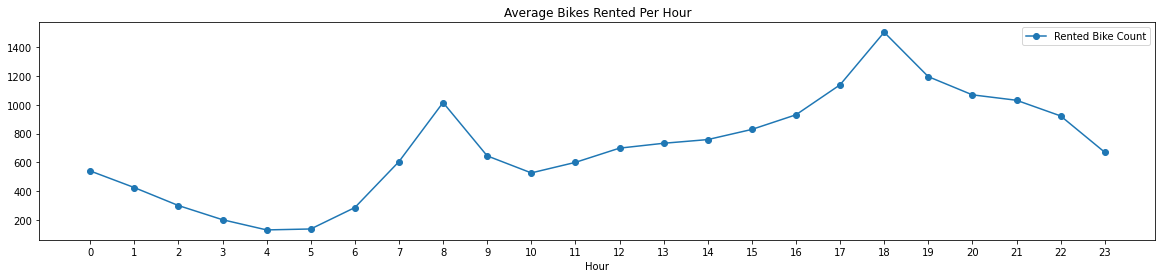

In [54]:
#ploting line graph hour and rented bike average
avg_rent_hrs = data.groupby('Hour')['Rented Bike Count'].mean()

plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hour")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist());

# Observation

*   High rise of Rented Bikes from 8:00 a.m to 6:00 p.m means people prefer rented bike during rush hour.




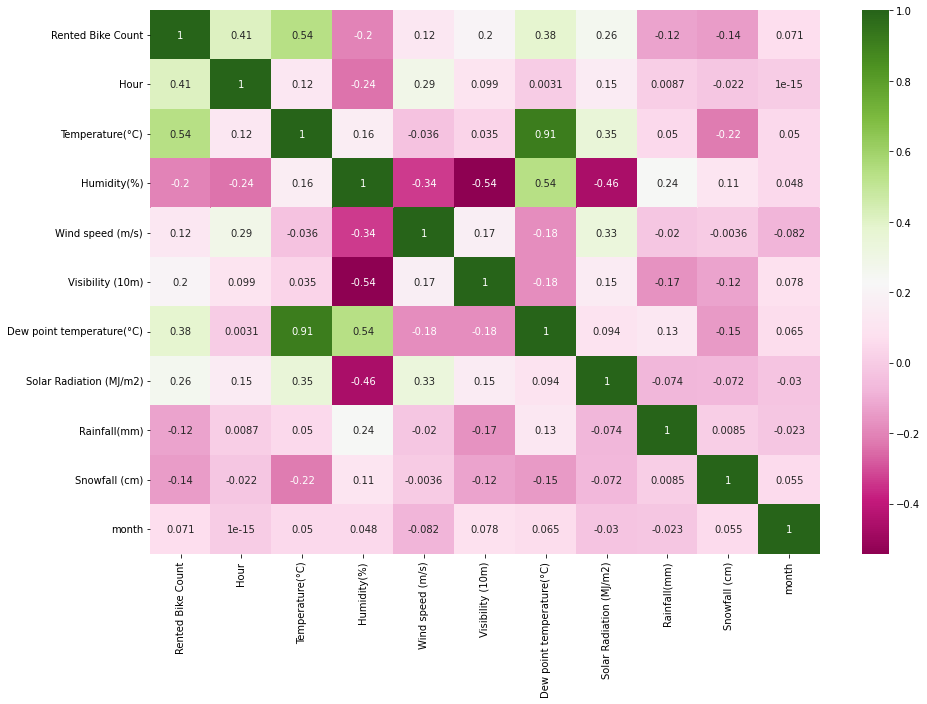

In [59]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='PiYG',annot=True)

In [60]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [80]:
data.drop(['week_day'],axis=1,inplace = True)

In [86]:
cat_features.drop(['week_day'],axis=1,inplace = True)

In [81]:
calc_vif(data[[i for i in data.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,Hour,3.956097
1,Temperature(°C),3.230202
2,Humidity(%),6.006861
3,Wind speed (m/s),4.615739
4,Visibility (10m),5.332471
5,Solar Radiation (MJ/m2),2.265399
6,Rainfall(mm),1.081093
7,Snowfall (cm),1.124563
8,month,4.577143


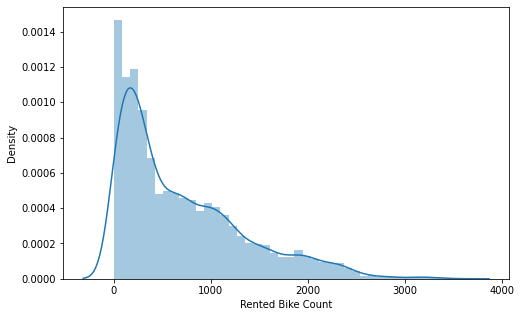

In [82]:
#visualising distribution
plt.figure(figsize=(8,5))
sns.distplot(data['Rented Bike Count'])

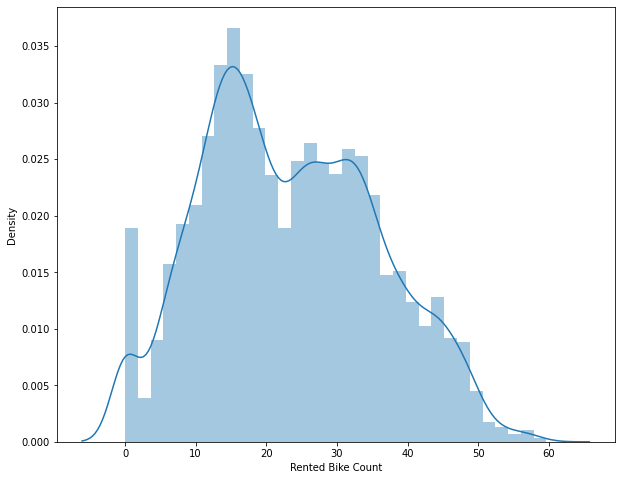

In [83]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(data['Rented Bike Count']))

In [87]:
#label_encoding for categorical columns
label_encoding= pd.get_dummies(cat_features,drop_first=True)

In [88]:
label_encoding.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,0,1,1,1
1,0,0,1,1,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


In [90]:
#concating numeric columns and dummy columns and creating final df
df= pd.concat([label_encoding,num_feature],axis=1)

In [91]:
df.head()

,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month
0,0,0,1,1,1,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,0,0,1,1,1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,0,0,1,1,1,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,0,0,1,1,1,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,0,0,1,1,1,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


## Average bike rented per hour

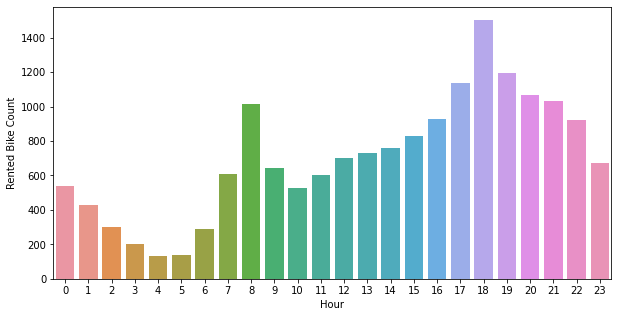

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Hour', y = 'Rented Bike Count', data = df, ci = None)

# Observation

*   We can clearly see there is high demand of Rented bike between the office hours.




## Average bike rented vs Holiday or not

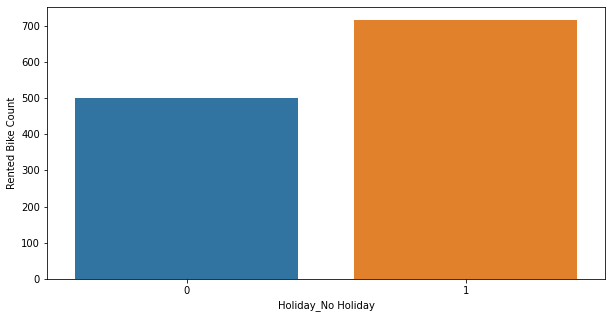

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Holiday_No Holiday', y = 'Rented Bike Count', data = df, ci = None)

# observation


*   Working days has comparatively high demand of rented bike as compared to non working day.



## Rainfall vs bike demand

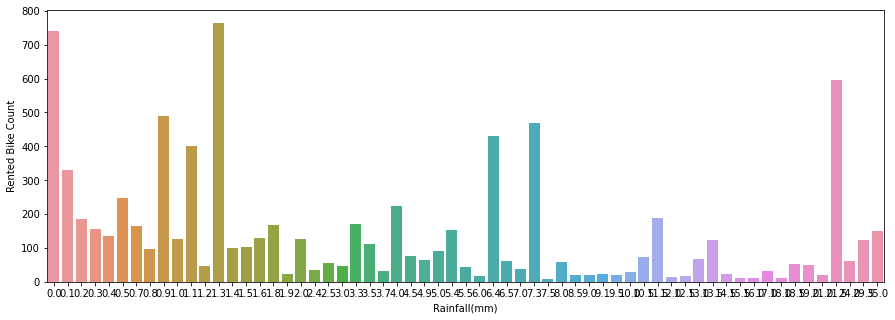

In [111]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Rainfall(mm)', y = 'Rented Bike Count', data = df, ci = None)

# Observation 


*   Rainfall increase demand of Rented Bike Decreases.
.




## Snow fall vs bike demand

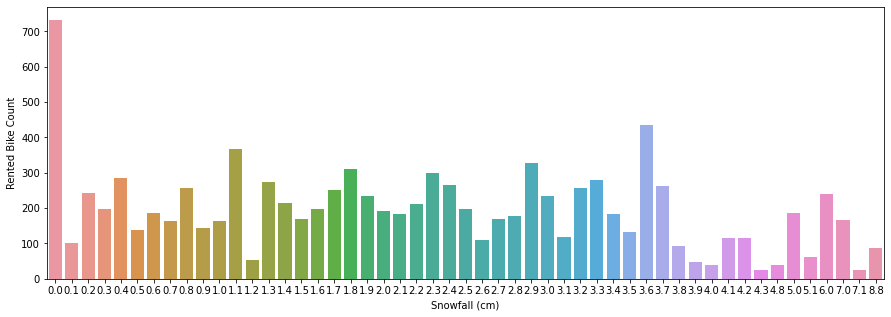

In [113]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'Snowfall (cm)', y = 'Rented Bike Count', data = df, ci = None)

## Observation

*   if Snowfall increase demand of Rented Bike Decreases.




## Bike demand on month

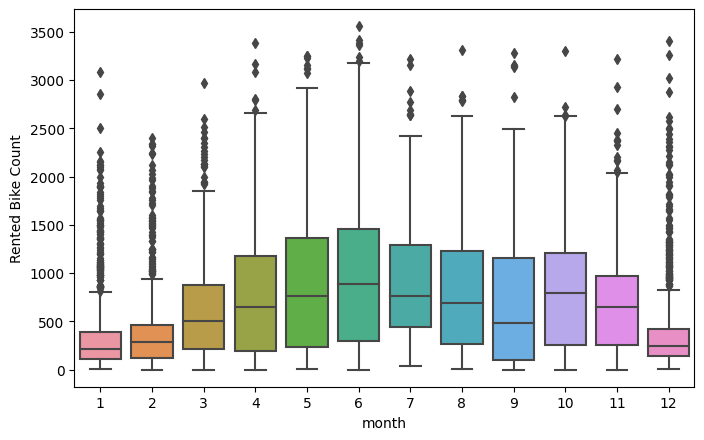

In [115]:
plt.figure(figsize=(8,5),dpi=100)
sns.boxplot(x='month',y='Rented Bike Count',data=df)
plt.show()

# observation

*   We can see that there is less demand in the month of December, january,February (winter seasons).
*   Demand of bike is maximum during May,june,july (Summer seasons).





## Creating Model

In [117]:
# Splittind data
from sklearn.model_selection import train_test_split

X=df.drop(['Rented Bike Count'],axis=1)
y=np.sqrt(df['Rented Bike Count'])

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [120]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

## Linear Regresseion

In [126]:
# importing linear regresseion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error
from math import sqrt


In [128]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_pred

array([22.40887354, 29.56376265, 26.37806417, ..., 25.61199539,
       27.37489371, 22.48196068])

In [135]:
# Checking cofficient and intercept
lr.intercept_,lr.coef_

(23.405627322020383,
 array([-1.13824165, -1.31638154, -3.41353069,  0.63627581,  5.04757846,
         3.42445847, -0.15937789, -6.09230513,  0.09749234, -0.07046539,
         6.93037842, -0.59240872, -1.66267802,  0.1249603 ,  0.32902351]))

In [136]:
print ("Training Score : " , lr.score(X_train, y_train))
print ("Validation Score : ", lr.score(X_test, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_error(lr_pred, y_test)))
print ("R2_Score : ", r2_score(lr_pred, y_test))


Training Score :  0.6545315601710189
Validation Score :  0.6532321625183535
RMSLE :  7.3062196185463195
R2_Score :  0.44948410347426193


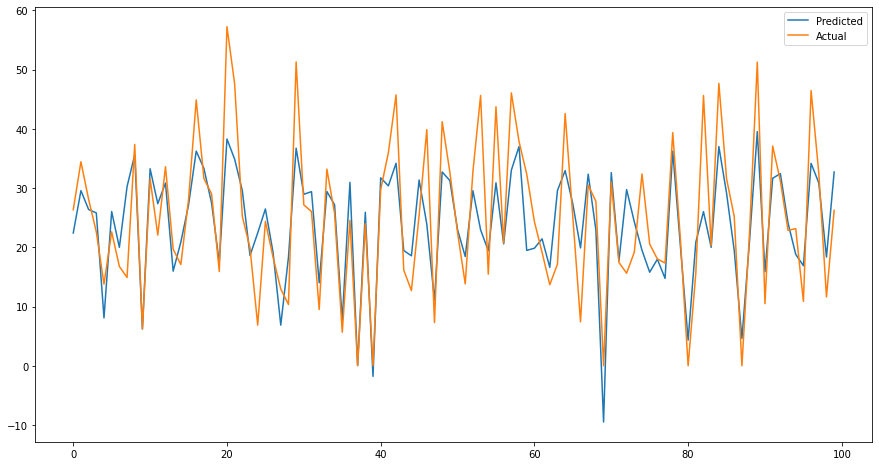

In [143]:
plt.figure(figsize=(15,8))
plt.plot((lr_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()


## Regularisation

# Lasso Regression

In [144]:
from sklearn.linear_model import Lasso, LassoCV

In [148]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

In [151]:
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)
reg_pred

array([25.47327228, 26.92509825, 26.52305055, ..., 23.17254395,
       27.02819908, 20.15021061])

In [152]:
print ("Training Score : " , reg.score(X_train, y_train))
print ("Validation Score : ", reg.score(X_test, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_error(reg_pred, y_test)))
print ("R2_Score : ", r2_score(reg_pred, y_test))

Training Score :  0.605821076593945
Validation Score :  0.6068357271994218
RMSLE :  7.779655047169706
R2_Score :  -0.013004080267719598


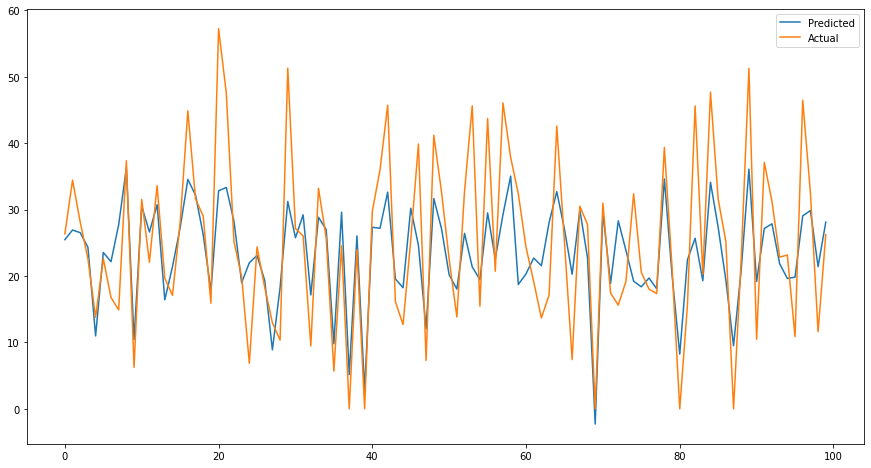

In [153]:
plt.figure(figsize=(15,8))
plt.plot((reg_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

# Ridge regression

In [154]:
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)

In [155]:
rid = Ridge(alpha=1)
rid.fit(X_train, y_train)
rid_pred = reg.predict(X_test)
rid_pred

array([25.47327228, 26.92509825, 26.52305055, ..., 23.17254395,
       27.02819908, 20.15021061])

In [156]:
print ("Training Score : " , rid.score(X_train, y_train))
print ("Validation Score : ", rid.score(X_test, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_error(rid_pred, y_test)))
print ("R2_Score : ", r2_score(rid_pred, y_test))

Training Score :  0.6545301548197402
Validation Score :  0.6533470576451739
RMSLE :  7.779655047169706
R2_Score :  -0.013004080267719598


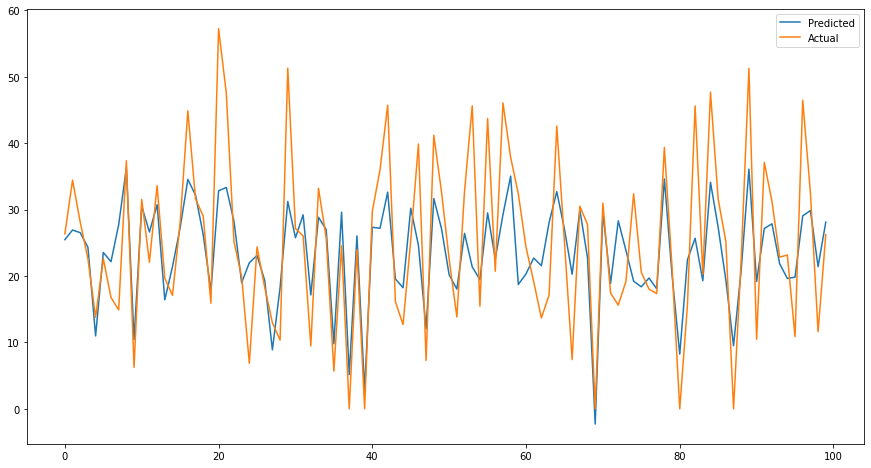

In [158]:
plt.figure(figsize=(15,8))
plt.plot((rid_pred)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

## Decision tree

In [159]:
#decision tree implementation
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(criterion="mse", max_depth=10)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_pred

array([39.94793069, 31.1526287 , 27.0405197 , ..., 29.9743607 ,
       31.1526287 , 23.26139084])

In [161]:
#examining 
print ("Training Score : " , dt.score(X_train, y_train))
print ("Validation Score : ",dt.score(X_test, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_error(dt_pred, y_test)))
print ("R2_Score : ", r2_score(dt_pred, y_test))

Training Score :  0.9165791605374933
Validation Score :  0.8392110859968192
RMSLE :  4.975094890309787
R2_Score :  0.82463540891392


Text(0.5, 1.0, 'Test VS Prediction')

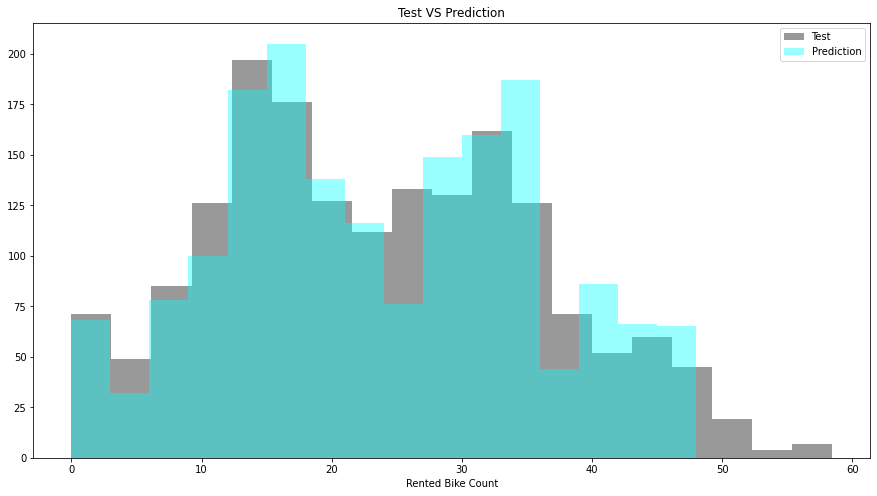

In [162]:
plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

## Random forest

In [163]:
#random forest implementation
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(criterion="mse", n_estimators=5, max_depth=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_pred

array([36.69357424, 32.04264867, 29.61369149, ..., 29.91361565,
       30.93681079, 24.22247148])

In [164]:
#examining metrics 

print ("Training Score : " , rf.score(X_train, y_train))
print ("Validation Score : ", rf.score(X_test, y_test))
print ("R2_Score : ", r2_score(rf_pred, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_error(rf_pred, y_test)))

Training Score :  0.9221812315628987
Validation Score :  0.8769815002578767
R2_Score :  0.859292776600346
RMSLE :  4.351695817748054


Text(0.5, 1.0, 'Test VS Prediction')

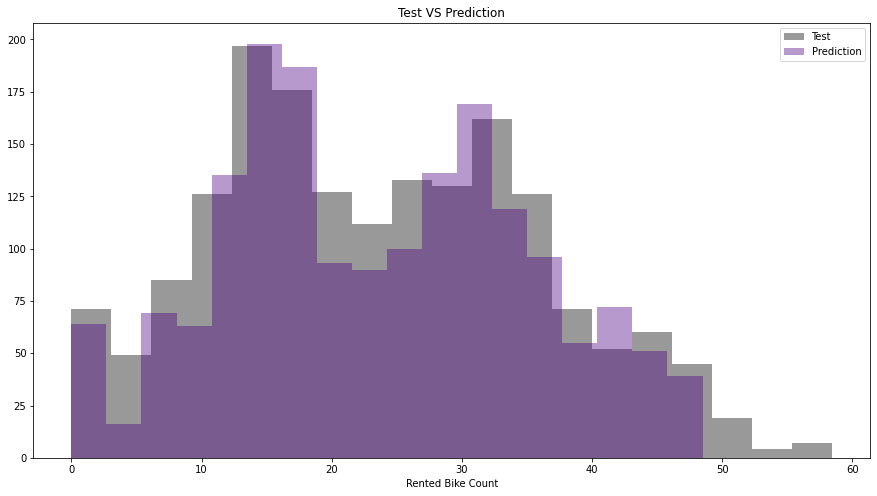

In [165]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

In [182]:
# creating a list of all model names
model_list = ['Linear regression','Lasso regression','Ridge regression','Decision Tree ','Random Forest']

In [184]:
# creating a list of all model r2 score

result_list = [r2_score(lr_pred, y_test),r2_score(reg_pred, y_test),r2_score(rid_pred, y_test), r2_score(dt_pred, y_test),r2_score(rf_pred, y_test)]

In [185]:
# creating an empty dataframe

results_df = pd.DataFrame()

In [186]:
# adding above lists to the empty dataframe

results_df['model name'] = model_list
results_df['R2-score'] = result_list

In [187]:
results_df

,model name,R2-score
0,Linear regression,0.449484
1,Lasso regression,-0.013004
2,Ridge regression,-0.013004
3,Decision Tree,0.824635
4,Random Forest,0.859293


## Conclusion


*   In holiday or non-working days there is demands in rented bikes.
*   here is a surge of high demand in the morning 8AM and in evening 6PM as the people might be going to their work at morning 8AM and returing from their work at the evening 6PM.

*   People prefered more rented bikes in the morning than the evening.
*   When the rainfall was less, people have booked more bikes except some few cases.


*   Temperature, Hour & Humidity are the most important features that positively drive the total rented bikes count.


*   The best model for this dataset is Random forest.





